#Elective Course: Computational Intelligence and Machine Learning  
### University of Patras

Author: Kristian Louka, Computer Engineering and Informatics Department, CEID Upatras. (up1072625@ac.upatras.gr)

###Project 2023-2024 Part A: Temporal Analysis of Ancient Inscriptions using Neural Networks



###Properties of this Notebook (Google Collab)



In [ ]:
import platform
print("System Information:")
print("Python Version:", platform.python_version())
print("OS:", platform.system())
print("Processor Architecture:", platform.processor())

### Some general information:
The provided file "iphi2802.csv" containing all the data used for this project.

## Part A1: Preprocessing and Preparing the data

###Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

###Importing the dataset

In [ ]:
df = pd.read_csv('iphi2802.csv', delimiter='\t')
#Dataset recognizes the tab (\t) as the delimiter and not comma (,)


In [ ]:
df.head()

,id,text,metadata,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa
0,315181,[φ]ιλεταιρος ευμενου περγαμευς μουσαις. καφισι...,Boiotia — Thespiai — mid-3rd c. BC — BCH 26 (1...,1698,Central Greece (IG VII-IX),1691,"Megaris, Oropia, and Boiotia (IG VII)",mid-3rd c. BC,-275.0,-226.0,0.0
1,201686,μαλκοιδων ηρωνος.,"Crete, W. — Tarrha — 1st-3rd c. AD — IC II xxi...",1699,"Aegean Islands, incl. Crete (IG XI-[XIII])",474,Crete,1st-3rd c. AD,1.0,300.0,0.0
2,153178,βασιλικος.,Makedonia (Bottiaia) — Pella — 3rd/2nd c. BC —...,1692,Northern Greece (IG X),1485,Macedonia,3rd/2nd c. BC,-300.0,-101.0,0.0
3,28582,αισκλαπιει μ [ανεθεκε --].,Epidauria — Epidauros — sinistr. — 6th/5th c. BC,1690,Peloponnesos (IG IV-[VI]),1643,"Epidauria (IG IV²,1)",6th/5th c. BC,-600.0,-401.0,0.0
4,333620,[---]ος αν[εθηκε δαματρι].,Italia — Herakleia (Policoro) — late 4th/early...,1696,"Sicily, Italy, and the West (IG XIV)",1689,"Italy, incl. Magna Graecia",late 4th/early 3rd c. BC,-350.0,-251.0,0.0


In [ ]:
descr = df.describe(include='all')
descr

,id,text,metadata,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa
count,2802.000000,2802,2802,2802.000000,2802,2802.000000,2802,2802,2802.000000,2802.000000,2802.000000
unique,NaN,2795,2530,NaN,14,NaN,71,1384,NaN,NaN,NaN
top,NaN,αγαθοκλευς.,Att. — Athens: Kerameikos — non-stoich. — ca. ...,NaN,Asia Minor,NaN,Attica,Rom. Imp. period,NaN,NaN,NaN
freq,NaN,3,18,NaN,517,NaN,337,88,NaN,NaN,NaN
mean,236349.370807,NaN,NaN,1696.552819,NaN,1589.154176,NaN,NaN,-83.832976,40.399001,0.265168
std,92426.957620,NaN,NaN,6.579823,NaN,233.619434,NaN,NaN,259.767157,318.636243,0.441501
min,15.000000,NaN,NaN,1614.000000,NaN,474.000000,NaN,NaN,-720.000000,-690.000000,0.000000
25%,183659.000000,NaN,NaN,1695.000000,NaN,1639.000000,NaN,NaN,-300.000000,-201.000000,0.000000
50%,241708.000000,NaN,NaN,1698.000000,NaN,1672.000000,NaN,NaN,-100.000000,2.000000,0.000000
75%,314915.750000,NaN,NaN,1701.000000,NaN,1688.000000,NaN,NaN,101.000000,284.000000,1.000000


###Tokenization and Vectorization

In [ ]:
#########################################
from sklearn.feature_extraction.text import TfidfVectorizer

#TfidfVectorizer for TF-IDF encoding with max_features (tokens) set to 1000
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Alternatively, -> 2000
# tfidf_vectorizer = TfidfVectorizer(max_features=2000)

# Fit and transform the text column to create the TF-IDF matrix
token_tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Print the shape of the TF-IDF matrix ====>> (2802 => number of documents(=rows), 1000 => number of unique tokens)
print("Shape of TF-IDF matrix:", token_tfidf_matrix.shape)

# Optionally, convert TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(token_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

# Get the vocabulary (tokens) generated by the TfidfVectorizer
tokens = tfidf_vectorizer.get_feature_names_out()

# Print the total number of tokens
print("Total number of tokens:", len(tokens))

Shape of TF-IDF matrix: (2802, 1000)
    αγ  αγα  αγαθ  αγαθα  αγαθαι  αγαθει  αγαθη  αγαθηι  αγαθον  αγαθος  ...  \
0  0.0  0.0   0.0    0.0     0.0     0.0    0.0     0.0     0.0     0.0  ...   
1  0.0  0.0   0.0    0.0     0.0     0.0    0.0     0.0     0.0     0.0  ...   
2  0.0  0.0   0.0    0.0     0.0     0.0    0.0     0.0     0.0     0.0  ...   
3  0.0  0.0   0.0    0.0     0.0     0.0    0.0     0.0     0.0     0.0  ...   
4  0.0  0.0   0.0    0.0     0.0     0.0    0.0     0.0     0.0     0.0  ...   

    ωι  ωιτε   ων  ωναν  ωνη  ωνος  ωρος  ωρωπιων   ως  ωστε  
0  0.0   0.0  0.0   0.0  0.0   0.0   0.0      0.0  0.0   0.0  
1  0.0   0.0  0.0   0.0  0.0   0.0   0.0      0.0  0.0   0.0  
2  0.0   0.0  0.0   0.0  0.0   0.0   0.0      0.0  0.0   0.0  
3  0.0   0.0  0.0   0.0  0.0   0.0   0.0      0.0  0.0   0.0  
4  0.0   0.0  0.0   0.0  0.0   0.0   0.0      0.0  0.0   0.0  

[5 rows x 1000 columns]
Total number of tokens: 1000


In [ ]:
tfidf_df.describe()

,αγ,αγα,αγαθ,αγαθα,αγαθαι,αγαθει,αγαθη,αγαθηι,αγαθον,αγαθος,...,ωι,ωιτε,ων,ωναν,ωνη,ωνος,ωρος,ωρωπιων,ως,ωστε
count,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,...,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000
mean,0.002543,0.001059,0.001537,0.001363,0.000632,0.000335,0.003292,0.002489,0.000823,0.000790,...,0.004242,0.000432,0.011030,0.001355,0.000502,0.002633,0.001437,0.000818,0.005948,0.000383
std,0.032484,0.019990,0.028841,0.024400,0.013327,0.006148,0.036371,0.029985,0.014902,0.012250,...,0.034271,0.007775,0.057507,0.015229,0.016909,0.038930,0.027176,0.016924,0.046543,0.007541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.864675,0.631875,0.781310,0.716917,0.487949,0.198694,0.716776,0.718842,0.464097,0.316436,...,1.000000,0.182876,1.000000,0.247760,0.770180,1.000000,0.763217,0.592520,1.000000,0.243965


###Normalization or Min-Max Scaling

####Our tdidf_df is already 'normalized', so we continue to search in our dataset for columns that need to be normalized.

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Check range of values for numerical columns
for column in numerical_columns:
    column_values = df[column]
    min_value = column_values.min()
    max_value = column_values.max()
    print(f"Column '{column}': Min={min_value}, Max={max_value}")


Column 'id': Min=15, Max=353705
Column 'region_main_id': Min=1614, Max=1702
Column 'region_sub_id': Min=474, Max=1700
Column 'date_min': Min=-720.0, Max=1100.0
Column 'date_max': Min=-690.0, Max=1453.0
Column 'date_circa': Min=0.0, Max=1.0


In [ ]:
# We proceed to normalise the region_main_id, region_sub_id, date_min and date_max columns with the MinMaxScaler method.
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform 'region_main_id' , 'region_sub_id' ,  'date_min' and 'date_max' columns
df[['region_main_id','region_sub_id','date_min', 'date_max']] = scaler.fit_transform(df[['region_main_id','region_sub_id','date_min', 'date_max']])

In [ ]:
#checking if the minmaxscaler is applied:
df

,id,text,metadata,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa
0,315181,[φ]ιλεταιρος ευμενου περγαμευς μουσαις. καφισι...,Boiotia — Thespiai — mid-3rd c. BC — BCH 26 (1...,0.954545,Central Greece (IG VII-IX),0.992659,"Megaris, Oropia, and Boiotia (IG VII)",mid-3rd c. BC,0.244505,0.216519,0.0
1,201686,μαλκοιδων ηρωνος.,"Crete, W. — Tarrha — 1st-3rd c. AD — IC II xxi...",0.965909,"Aegean Islands, incl. Crete (IG XI-[XIII])",0.000000,Crete,1st-3rd c. AD,0.396154,0.461969,0.0
2,153178,βασιλικος.,Makedonia (Bottiaia) — Pella — 3rd/2nd c. BC —...,0.886364,Northern Greece (IG X),0.824633,Macedonia,3rd/2nd c. BC,0.230769,0.274848,0.0
3,28582,αισκλαπιει μ [ανεθεκε --].,Epidauria — Epidauros — sinistr. — 6th/5th c. BC,0.863636,Peloponnesos (IG IV-[VI]),0.953507,"Epidauria (IG IV²,1)",6th/5th c. BC,0.065934,0.134858,0.0
4,333620,[---]ος αν[εθηκε δαματρι].,Italia — Herakleia (Policoro) — late 4th/early...,0.931818,"Sicily, Italy, and the West (IG XIV)",0.991028,"Italy, incl. Magna Graecia",late 4th/early 3rd c. BC,0.203297,0.204853,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2797,173479,φλαουιος κατυλλος ζων και φρονων ανεστησα τον ...,Scythia Minor — Tomis (Constanța) — 3rd/beg. 4...,0.943182,Thrace and the Lower Danube (IG X),0.979608,Scythia Minor,3rd/beg. 4th c. AD,0.506044,0.485301,0.0
2798,281131,αυτοκρατορα καισαρα μαρκον αυρηλιον αντωνεινον...,"Pisid. — Sia (Karaot, nr.) — 161-180 AD — BCH ...",1.000000,Asia Minor,0.976346,Pisidia,161-180 AD,0.484066,0.405973,0.0
2799,236823,αριστοκρατου πυρρος βουκεφαλας 0.,Att. — Athens: Kerameikos — non-stoich. — ca. ...,0.988636,Attica (IG I-III),1.000000,Attica,ca. 260-240 BC,0.252747,0.209986,1.0
2800,351112,[------] [---]τωι[---] [------].,Pamph. — Side (Eski Adalia-Selimiye) — Rom. Im...,1.000000,Asia Minor,0.960033,Pamphylia,Rom. Imp. period,0.380769,0.454503,0.0


In [ ]:
tfidf_df

,αγ,αγα,αγαθ,αγαθα,αγαθαι,αγαθει,αγαθη,αγαθηι,αγαθον,αγαθος,...,ωι,ωιτε,ων,ωναν,ωνη,ωνος,ωρος,ωρωπιων,ως,ωστε
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['date_approx'] = df[['date_min', 'date_max']].mean(axis=1)
df

,id,text,metadata,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,date_approx
0,315181,[φ]ιλεταιρος ευμενου περγαμευς μουσαις. καφισι...,Boiotia — Thespiai — mid-3rd c. BC — BCH 26 (1...,0.954545,Central Greece (IG VII-IX),0.992659,"Megaris, Oropia, and Boiotia (IG VII)",mid-3rd c. BC,0.244505,0.216519,0.0,0.230512
1,201686,μαλκοιδων ηρωνος.,"Crete, W. — Tarrha — 1st-3rd c. AD — IC II xxi...",0.965909,"Aegean Islands, incl. Crete (IG XI-[XIII])",0.000000,Crete,1st-3rd c. AD,0.396154,0.461969,0.0,0.429062
2,153178,βασιλικος.,Makedonia (Bottiaia) — Pella — 3rd/2nd c. BC —...,0.886364,Northern Greece (IG X),0.824633,Macedonia,3rd/2nd c. BC,0.230769,0.274848,0.0,0.252809
3,28582,αισκλαπιει μ [ανεθεκε --].,Epidauria — Epidauros — sinistr. — 6th/5th c. BC,0.863636,Peloponnesos (IG IV-[VI]),0.953507,"Epidauria (IG IV²,1)",6th/5th c. BC,0.065934,0.134858,0.0,0.100396
4,333620,[---]ος αν[εθηκε δαματρι].,Italia — Herakleia (Policoro) — late 4th/early...,0.931818,"Sicily, Italy, and the West (IG XIV)",0.991028,"Italy, incl. Magna Graecia",late 4th/early 3rd c. BC,0.203297,0.204853,0.0,0.204075
...,...,...,...,...,...,...,...,...,...,...,...,...
2797,173479,φλαουιος κατυλλος ζων και φρονων ανεστησα τον ...,Scythia Minor — Tomis (Constanța) — 3rd/beg. 4...,0.943182,Thrace and the Lower Danube (IG X),0.979608,Scythia Minor,3rd/beg. 4th c. AD,0.506044,0.485301,0.0,0.495672
2798,281131,αυτοκρατορα καισαρα μαρκον αυρηλιον αντωνεινον...,"Pisid. — Sia (Karaot, nr.) — 161-180 AD — BCH ...",1.000000,Asia Minor,0.976346,Pisidia,161-180 AD,0.484066,0.405973,0.0,0.445019
2799,236823,αριστοκρατου πυρρος βουκεφαλας 0.,Att. — Athens: Kerameikos — non-stoich. — ca. ...,0.988636,Attica (IG I-III),1.000000,Attica,ca. 260-240 BC,0.252747,0.209986,1.0,0.231367
2800,351112,[------] [---]τωι[---] [------].,Pamph. — Side (Eski Adalia-Selimiye) — Rom. Im...,1.000000,Asia Minor,0.960033,Pamphylia,Rom. Imp. period,0.380769,0.454503,0.0,0.417636


In [ ]:
tfidf_df

,αγ,αγα,αγαθ,αγαθα,αγαθαι,αγαθει,αγαθη,αγαθηι,αγαθον,αγαθος,...,ωι,ωιτε,ων,ωναν,ωνη,ωνος,ωρος,ωρωπιων,ως,ωστε
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create a new DataFrame with selected columns
X2 = df[['region_main_id', 'region_sub_id']].copy()

# Display the new DataFrame
print(X2)


      region_main_id  region_sub_id
0           0.954545       0.992659
1           0.965909       0.000000
2           0.886364       0.824633
3           0.863636       0.953507
4           0.931818       0.991028
...              ...            ...
2797        0.943182       0.979608
2798        1.000000       0.976346
2799        0.988636       1.000000
2800        1.000000       0.960033
2801        0.965909       0.977162

[2802 rows x 2 columns]


In [ ]:
# Concatenate X and tf_idf_df along the columns axis
X= pd.concat([X2, tfidf_df], axis=1, join='inner')

# Display the new DataFrame with tokens
print(X)
X.describe()
#[df1, df2, df3, ...]: A list of dataframes to concatenate.
#axis: Specifies the axis along which to concatenate. axis=0 means we concatenate along the rows (i.e., stack vertically),
  #while axis=1 means we concatenate along the columns (i.e., stack horizontally).
#join: Specifies how to handle columns that are not present in all dataframes. join='outer' means we include all columns in the output dataframe,
  # nd missing values are filled with NaN. join='inner' means we only include columns that are present in all dataframes.

      region_main_id  region_sub_id   αγ  αγα  αγαθ  αγαθα  αγαθαι  αγαθει  \
0           0.954545       0.992659  0.0  0.0   0.0    0.0     0.0     0.0   
1           0.965909       0.000000  0.0  0.0   0.0    0.0     0.0     0.0   
2           0.886364       0.824633  0.0  0.0   0.0    0.0     0.0     0.0   
3           0.863636       0.953507  0.0  0.0   0.0    0.0     0.0     0.0   
4           0.931818       0.991028  0.0  0.0   0.0    0.0     0.0     0.0   
...              ...            ...  ...  ...   ...    ...     ...     ...   
2797        0.943182       0.979608  0.0  0.0   0.0    0.0     0.0     0.0   
2798        1.000000       0.976346  0.0  0.0   0.0    0.0     0.0     0.0   
2799        0.988636       1.000000  0.0  0.0   0.0    0.0     0.0     0.0   
2800        1.000000       0.960033  0.0  0.0   0.0    0.0     0.0     0.0   
2801        0.965909       0.977162  0.0  0.0   0.0    0.0     0.0     0.0   

      αγαθη  αγαθηι  ...   ωι  ωιτε   ων  ωναν  ωνη  ωνος  ωρος

,region_main_id,region_sub_id,αγ,αγα,αγαθ,αγαθα,αγαθαι,αγαθει,αγαθη,αγαθηι,...,ωι,ωιτε,ων,ωναν,ωνη,ωνος,ωρος,ωρωπιων,ως,ωστε
count,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,...,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000
mean,0.938100,0.909587,0.002543,0.001059,0.001537,0.001363,0.000632,0.000335,0.003292,0.002489,...,0.004242,0.000432,0.011030,0.001355,0.000502,0.002633,0.001437,0.000818,0.005948,0.000383
std,0.074771,0.190554,0.032484,0.019990,0.028841,0.024400,0.013327,0.006148,0.036371,0.029985,...,0.034271,0.007775,0.057507,0.015229,0.016909,0.038930,0.027176,0.016924,0.046543,0.007541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920455,0.950245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.954545,0.977162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.988636,0.990212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.864675,0.631875,0.781310,0.716917,0.487949,0.198694,0.716776,0.718842,...,1.000000,0.182876,1.000000,0.247760,0.770180,1.000000,0.763217,0.592520,1.000000,0.243965


In [ ]:
Y = df.iloc[:,-1].values
print(Y)


[0.2305122  0.42906152 0.25280879 ... 0.23136663 0.41763613 0.21804444]


In [ ]:
X

,region_main_id,region_sub_id,αγ,αγα,αγαθ,αγαθα,αγαθαι,αγαθει,αγαθη,αγαθηι,...,ωι,ωιτε,ων,ωναν,ωνη,ωνος,ωρος,ωρωπιων,ως,ωστε
0,0.954545,0.992659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.886364,0.824633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.863636,0.953507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.931818,0.991028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0.943182,0.979608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,1.000000,0.976346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2799,0.988636,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2800,1.000000,0.960033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**Dataset info**
X = input (2802 x 1002)

Y = output (dependent variable)

###Splitting the dataset into Training Set and Test Set ---  Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
# Split the data to training and testing data 5-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
rmseList = []
rrseList = []

##Part A2: Architecture Selection

In [ ]:
print(X)

### a-c **Activation Functions**

###Hidden Layer  
For our neural network, we will employ two types of activation functions. The first will be used in the hidden layer, and the second in the output layer.

Based on our literature review and experimental results, particularly considering their impact on error, we will use the ReLU function for the hidden layer as it is regarded as the best and most popular choice. ReLU introduces non-linearity into our model, allowing it to learn more complex patterns.

Furthermore, ReLU is computationally efficient due to its simplicity. It doesn't involve expensive operations like exponentiation, making it faster to compute than sigmoid or tanh.

While there is no literature conclusively proving that ReLU is indeed the best choice, based on experiments, competitions - challenges, and experience, we conclude that it is the most favored option.

###Ouput Layer
In general, the choice of the activation function for the output layer significantly depends on the problem our model aims to solve. In our case, we will utilize the linear activation function as we seek to predict the value of the "date_approx," a property we derived from "date_min" and "date_max" and defined as the dependent variable. Its values range continuously between 0 and 1, indicating that we are dealing with a regression problem.

The two options we dismissed are the sigmoid function, which is popular for binary classification problems, and the softmax function, which essentially generalizes the former and is preferred for multi-class classification tasks.

In [ ]:
#X = input
#Y = output (dependent variable)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

# Convert dataframe to a Numpy Array
#X = X.values

for i, (train, test) in enumerate(kfold.split(X)):
    # Create model
    model = Sequential()

    model.add(Dense(6, activation="relu", input_dim=1002))
    model.add(Dense(1, activation="linear"))  # Linear activation for regression

    # Compile model
    def rmse(Y_true, Y_pred):
        return K.sqrt(K.mean(K.square(Y_pred - Y_true)))
    #optimizer = Adam(learning_rate=0.001)
    optimizer = SGD(learning_rate=0.001, momentum=0.2, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse])

    # Fit model
    model.fit(X[train], Y[train], epochs=500, batch_size=500, verbose=0)

    # Evaluate model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    rmseList.append(scores[0])
    print("Fold :", i, " RMSE:", scores[1])

print("RMSE: ", np.mean(rmseList))


Fold : 0  RMSE: 0.13989879190921783
Fold : 1  RMSE: 0.13979533314704895
Fold : 2  RMSE: 0.1396285593509674
Fold : 3  RMSE: 0.15106965601444244
Fold : 4  RMSE: 0.14516980946063995
RMSE:  0.07343447108108264


###d. Experimenting on the number of nodes in the hidden layer, and plotting them (RMSE vs Epochs) based on test data

1. As the number of nodes increases, the RMSE decreases. Thus, we achieve better prediction accuracy when using more nodes in the hidden layer.
2. However, this increase in nodes leads to a significant increase in the model's execution time, as more time is required to train the parameters of the nodes.

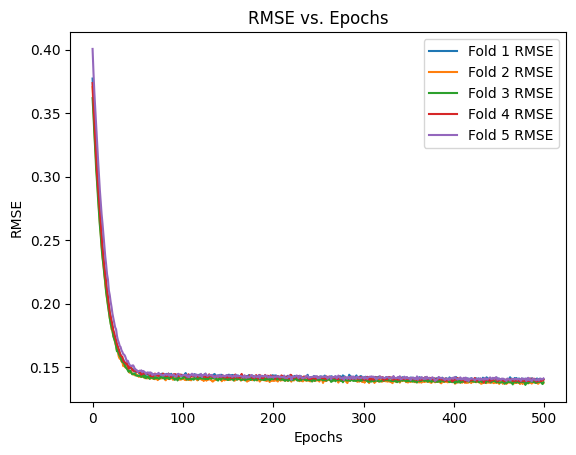

Mean RMSE: 0.019610444083809853


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import backend as K

# Initialize lists to store RMSE values for each fold
rmseList = []
all_rmse = []

# Define number of folds for cross-validation
n_splits = 5

# Initialize KFold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Iterate over each fold
for i, (train, test) in enumerate(kfold.split(X)):
    # Create model
    model = Sequential()
    model.add(Dense(1002, activation="relu", input_dim=1002))
    model.add(Dense(1, activation="linear"))  # Linear activation for regression

    # Compile model
    def rmse(Y_true, Y_pred):
        return K.sqrt(K.mean(K.square(Y_pred - Y_true)))

    optimizer = SGD(learning_rate=0.001, momentum=0.2, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse])

    # Fit model
    history = model.fit(X[train], Y[train], epochs=500, batch_size=500, verbose=0, validation_data=(X[test], Y[test]))

    # Evaluate model on test data
    scores = model.evaluate(X[test], Y[test], verbose=0)
    rmseList.append(scores[0])
    all_rmse.append(history.history['rmse'])

# Plot RMSE over epochs for all folds
for i, rmse_data in enumerate(all_rmse):
    plt.plot(rmse_data, label=f'Fold {i+1} RMSE')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epochs')
plt.legend()
plt.show()

# Display the mean RMSE across all folds
print("Mean RMSE:", np.mean(rmseList))


###e.Inserting hidden layers and experimenting on the number of the nodes within them.
A comprehensive response to this question, I believe, could stand as an assignment on its own. However, through experimentation with the number of nodes, we have drawn some conclusions.

In general, there are three scenarios:

1. Same number of nodes.
2. Decreasing number of nodes as the hidden layers increase.
3. Increasing number of nodes as the layers increase.

In the first case, we understand that this technique leads to a balanced model, without excessive complexity.

Our work falls into the third scenario, where increasing the nodes results in improved execution time and nearly the same error.

Moving on to adding an extra hidden layer (total of three hidden layers), by adding more hidden layers, we enhance the model's ability to comprehend or learn more complex patterns in our data. However, the risk of overfitting increases significantly.

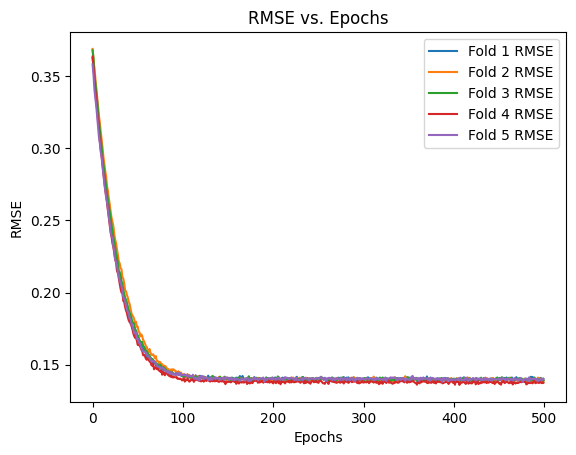

Mean RMSE: 0.01948978453874588


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import backend as K

# Initialize lists to store RMSE values for each fold
rmseList = []
all_rmse = []

# Define number of folds for cross-validation
n_splits = 5

# Initialize KFold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)
X=X.values
# Iterate over each fold
for i, (train, test) in enumerate(kfold.split(X)):
    # Create model
    model = Sequential()
    model.add(Dense(25, activation="relu", input_dim=1002)) #First Hidden Layer
    model.add(Dense(16, activation="relu")) #Second Hidden Layer
    model.add(Dense(86, activation="relu")) #Third Hidden Layer
    model.add(Dense(1, activation="linear"))  # Linear Activation for Regression

    # Compile model
    def rmse(Y_true, Y_pred):
        return K.sqrt(K.mean(K.square(Y_pred - Y_true)))

    optimizer = SGD(learning_rate=0.001, momentum=0.2, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse])

    # Fit model
    history = model.fit(X[train], Y[train], epochs=500, batch_size=500, verbose=0, validation_data=(X[test], Y[test]))

    # Evaluate model on test data
    scores = model.evaluate(X[test], Y[test], verbose=0)
    rmseList.append(scores[0])
    all_rmse.append(history.history['rmse'])

#Plot RMSE over epochs for all folds
for i, rmse_data in enumerate(all_rmse):
    plt.plot(rmse_data, label=f'Fold {i+1} RMSE')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epochs')
plt.legend()
plt.show()

#Display the mean RMSE across all folds
print("Mean RMSE:", np.mean(rmseList))


###st. Stopping Criteria

The training of the neural network is completed when one of the termination criteria of the algorithm is satisfied. (in each fold independently).

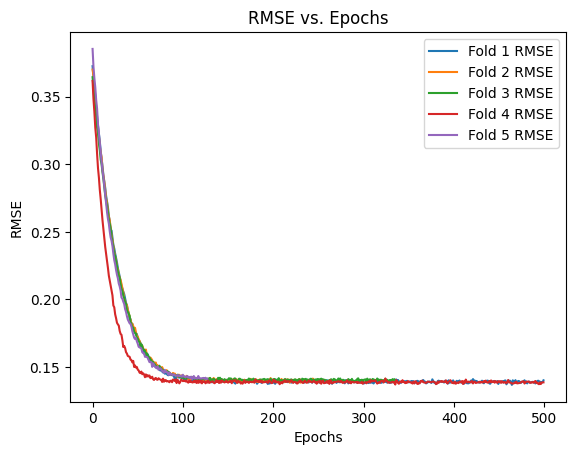

Mean RMSE: 0.0195051871240139


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras import backend as K


# Initialize lists to store RMSE values for each fold
rmseList = []
all_rmse = []

# Define number of folds for cross-validation
n_splits = 5

# Initialize KFold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Iterate over each fold
for i, (train, test) in enumerate(kfold.split(X)):
    # Define early stopping criteria for this fold
    early_stopping = EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True)

    # Create model
    model = Sequential()
    model.add(Dense(15, activation="relu", input_dim=1002)) #First Hidden Layer
    model.add(Dense(160, activation="relu")) #Second Hidden Layer
    model.add(Dense(45, activation="relu")) #Third Hidden Layer
    model.add(Dense(1, activation="linear"))  # Linear Activation for Regression

    # Compile model
    def rmse(Y_true, Y_pred):
        return K.sqrt(K.mean(K.square(Y_pred - Y_true)))

    optimizer = SGD(learning_rate=0.001, momentum=0.2, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse])

    # Fit model with early stopping
    history = model.fit(X[train], Y[train], epochs=500, batch_size=500, verbose=0,
                        validation_data=(X[test], Y[test]), callbacks=[early_stopping])

    # Evaluate model on test data
    scores = model.evaluate(X[test], Y[test], verbose=0)
    rmseList.append(scores[0])
    all_rmse.append(history.history['rmse'])

    # Plot RMSE over epochs for this fold
    plt.plot(history.history['rmse'], label=f'Fold {i+1} RMSE')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epochs')
plt.legend()
plt.show()

# Display the mean RMSE across all folds
print("Mean RMSE:", np.mean(rmseList))


##Part A3: Changing the Learning Rate and Momentum Constant

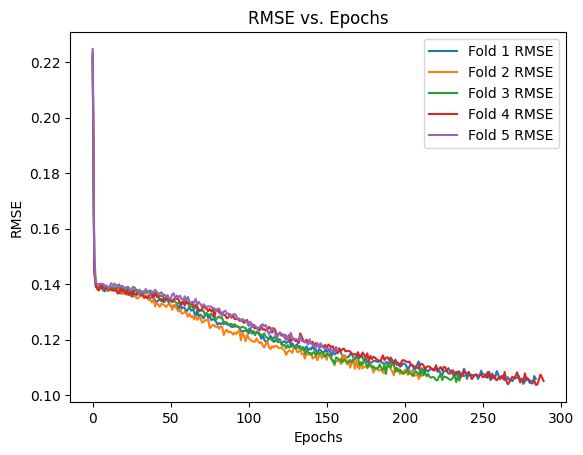

Mean RMSE: 0.014950994774699211


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras import backend as K

# Initialize lists to store RMSE values for each fold
rmseList = []
all_rmse = []

# Define number of folds for cross-validation
n_splits = 5

# Initialize KFold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Iterate over each fold
for i, (train, test) in enumerate(kfold.split(X)):

    # Define early stopping criteria for this fold
    early_stopping = EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True)

    # Create model
    model = Sequential()
    model.add(Dense(15, activation="relu", input_dim=1002)) #First Hidden Layer
    model.add(Dense(160, activation="relu")) #Second Hidden Layer
    model.add(Dense(45, activation="relu")) #Third Hidden Layer
    model.add(Dense(1, activation="linear"))  # Linear Activation for Regression

    # Compile model
    def rmse(Y_true, Y_pred):
        return K.sqrt(K.mean(K.square(Y_pred - Y_true)))

    optimizer = SGD(learning_rate=0.001, momentum=0.2, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse])

    # Fit model with early stopping
    history = model.fit(X[train], Y[train], epochs=500, batch_size=500, verbose=0,
                        validation_data=(X[test], Y[test]), callbacks=[early_stopping])

    # Evaluate model on test data
    scores = model.evaluate(X[test], Y[test], verbose=0)
    rmseList.append(scores[0])
    all_rmse.append(history.history['rmse'])

    # Plot RMSE over epochs for this fold
    plt.plot(history.history['rmse'], label=f'Fold {i+1} RMSE')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epochs')
plt.legend()
plt.show()

# Display the mean RMSE across all folds
print("Mean RMSE:", np.mean(rmseList))

###**Grid Search**
Exhaustive search over specified parameter values for an estimator.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Due to some crucial errors in sk library (we can also verify it from the web as a lot of people are facing the same error) we do not proceed with this usefull method.

##Part A4: Regularization
A way to avoid overfitting using Dropout Technique by Keras.

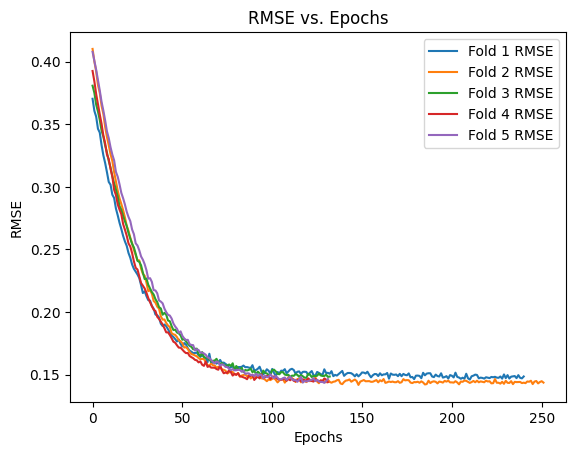

Mean RMSE: 0.019521696120500566


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras import backend as K

# Initialize lists to store RMSE values for each fold
rmseList = []
all_rmse = []

# Define number of folds for cross-validation
n_splits = 5

# Initialize KFold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Iterate over each fold
for i, (train, test) in enumerate(kfold.split(X)):
    # Define early stopping criteria for this fold
    early_stopping = EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True)

    # Create model
    model = Sequential()
    model.add(Dense(15, activation="relu", input_dim=1002)) # First Hidden Layer
    model.add(Dropout(0.8))  # dropout rate -> rin
    model.add(Dense(160, activation="relu")) # Second Hidden Layer
    model.add(Dropout(0.2))  # dropout rate -> rh
    model.add(Dense(45, activation="relu")) # Third Hidden Layer
    model.add(Dropout(0.2))  # dropout rate -> rh
    model.add(Dense(1, activation="linear"))  # Linear Activation for Regression

    # Compile model
    def rmse(Y_true, Y_pred):
        return K.sqrt(K.mean(K.square(Y_pred - Y_true)))

    optimizer = SGD(learning_rate=0.001, momentum=0.2, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse])

    # Fit model with early stopping
    history = model.fit(X[train], Y[train], epochs=500, batch_size=500, verbose=0,
                        validation_data=(X[test], Y[test]), callbacks=[early_stopping])

    # Evaluate model on test data
    scores = model.evaluate(X[test], Y[test], verbose=0)
    rmseList.append(scores[0])
    all_rmse.append(history.history['rmse'])

    # Plot RMSE over epochs for this fold
    plt.plot(history.history['rmse'], label=f'Fold {i+1} RMSE')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epochs')
plt.legend()
plt.show()

# Display the mean RMSE across all folds
print("Mean RMSE:", np.mean(rmseList))


## End of the Project.
###Thank you for your time. Part B is cooming soon! 🎉🎉🎉